In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st


In [46]:
y   = load('../../March2021/Observation_models/ObsY.joblib').sel(time=slice('1980-12-1','2014-1-31')) 
CNN = load('../../March2021/Observation_models/CNNY.joblib').sel(time=slice('1980-12-1','2014-1-31'))
ssp126 = load('FFEns_BC_126.joblib')
ssp245 = load('FFEns_BC_245.joblib')
ssp370 = load('FFEns_BC_370.joblib')
ssp585 = load('FFEns_BC_585.joblib')
ssp126

<xarray.DataArray (time: 5332)>
array([0.34269159, 0.58742234, 0.53119352, ..., 0.0531508 , 0.20908278,
       0.30468182])
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00

In [47]:
y.values=y.where(y>=0.46,0)
CNN.values=CNN.where(CNN>=0.46,0)
ssp126.values=ssp126.where(ssp126>=0.46,0)
ssp245.values=ssp245.where(ssp245>=0.46,0)
ssp370.values=ssp370.where(ssp370>=0.46,0)
ssp585.values=ssp585.where(ssp585>=0.46,0)

y.values=y.where(y==0.0,1)
CNN.values=CNN.where(CNN==0.0,1)
ssp126.values=ssp126.where(ssp126==0.0,1)
ssp245.values=ssp245.where(ssp245==0.0,1)
ssp370.values=ssp370.where(ssp370==0.0,1)
ssp585.values=ssp585.where(ssp585==0.0,1)

ssp126

<xarray.DataArray (time: 5332)>
array([0., 1., 1., ..., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00

In [50]:
def getyTs( dArray ):
    yrs=np.arange(1981,2015)
    yts=[]
    for yr in yrs:
        startDate=np.datetime64(str(yr-1)+'-12-01')
        #print(startDate)
        endDate=np.datetime64(str(yr)+'-01-31')
        #print(endDate)
        #print(y.sel(time=slice(startDate,endDate)).sum().values[()])
        yts.append(dArray.sel(time=slice(startDate,endDate)).sum().values[()])
    
    
    return yts
    

In [51]:
def getyTsFu( dArray ):
    yrs=np.arange(2016,2046)
    yts=[]
    for yr in yrs:
        startDate=np.datetime64(str(yr-1)+'-12-01')
        #print(startDate)
        endDate=np.datetime64(str(yr)+'-01-31')
        #print(endDate)
        #print(y.sel(time=slice(startDate,endDate)).sum().values[()])
        yts.append(dArray.sel(time=slice(startDate,endDate)).sum().values[()])
    
    
    return yts

In [62]:
def getyTsFu2( dArray ):
    yrs=np.arange(2046,2077)
    yts=[]
    for yr in yrs:
        startDate=np.datetime64(str(yr-1)+'-12-01')
        #print(startDate)
        endDate=np.datetime64(str(yr)+'-01-31')
        #print(endDate)
        #print(y.sel(time=slice(startDate,endDate)).sum().values[()])
        yts.append(dArray.sel(time=slice(startDate,endDate)).sum().values[()])
    
    
    return yts

In [63]:
def getyTsFu3( dArray ):
    yrs=np.arange(2077,2101)
    yts=[]
    for yr in yrs:
        startDate=np.datetime64(str(yr-1)+'-12-01')
        #print(startDate)
        endDate=np.datetime64(str(yr)+'-01-31')
        #print(endDate)
        #print(y.sel(time=slice(startDate,endDate)).sum().values[()])
        yts.append(dArray.sel(time=slice(startDate,endDate)).sum().values[()])
    
    
    return yts

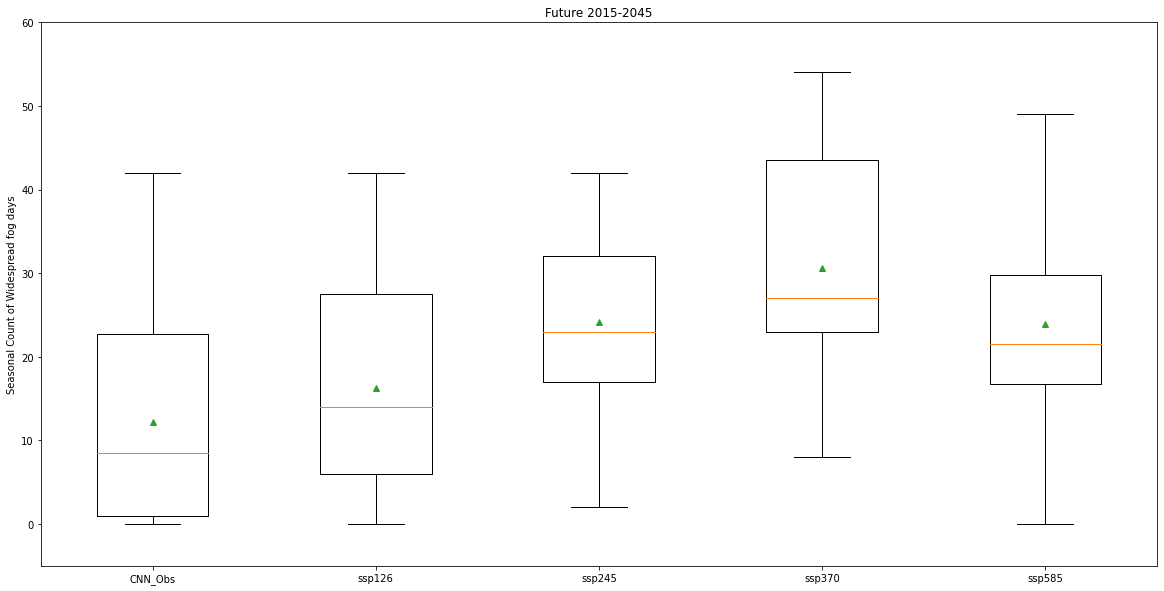

In [87]:
yList=getyTs(y)
cnnList=getyTs(CNN)
ssp126List=getyTsFu(ssp126)
ssp245List=getyTsFu(ssp245)
ssp370List=getyTsFu(ssp370)
ssp585List=getyTsFu(ssp585)

ssp245List

columns=[cnnList,ssp126List,ssp245List,ssp370List,ssp585List]
fig, ax = plt.subplots(figsize=(20, 10))
ax.boxplot(columns, showmeans=True,showfliers=False)
plt.xticks([1, 2,3,4,5], ["CNN_Obs", "ssp126", "ssp245", "ssp370",
                                          "ssp585"])
plt.ylim([-5, 60])
plt.ylabel('Seasonal Count of Widespread fog days') 
plt.title('Future 2015-2045') 
plt.savefig('box_plot_2015-2045.eps')


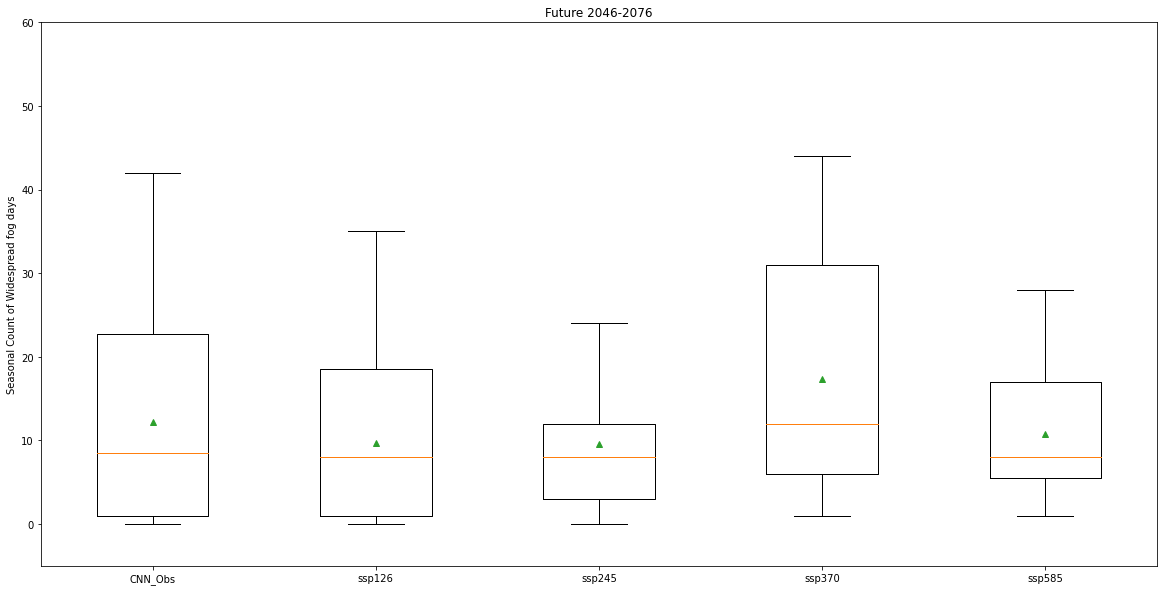

In [86]:
yList=getyTs(y)
cnnList=getyTs(CNN)
ssp126List=getyTsFu2(ssp126)
ssp245List=getyTsFu2(ssp245)
ssp370List=getyTsFu2(ssp370)
ssp585List=getyTsFu2(ssp585)

ssp245List

columns=[cnnList,ssp126List,ssp245List,ssp370List,ssp585List]
fig, ax = plt.subplots(figsize=(20, 10))
ax.boxplot(columns, showmeans=True,showfliers=False)
plt.xticks([1, 2,3,4,5], ["CNN_Obs", "ssp126", "ssp245", "ssp370",
                                          "ssp585"])
plt.ylim([-5, 60])
plt.ylabel('Seasonal Count of Widespread fog days') 
plt.title('Future 2046-2076') 
plt.savefig('box_plot_2046-2076.eps')


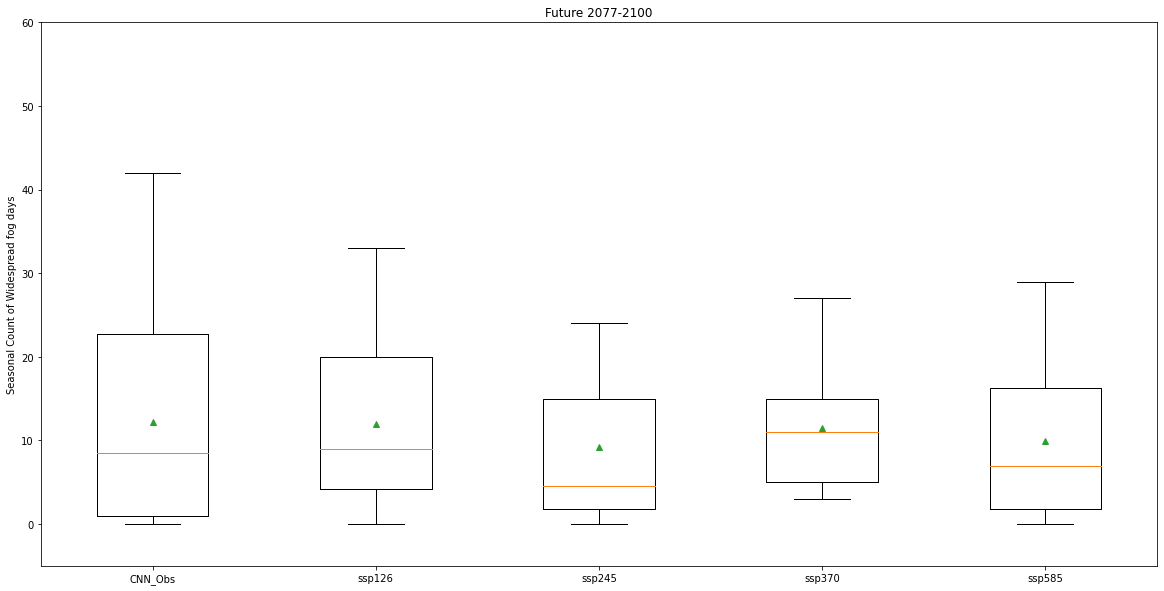

In [85]:
yList=getyTs(y)
cnnList=getyTs(CNN)
ssp126List=getyTsFu3(ssp126)
ssp245List=getyTsFu3(ssp245)
ssp370List=getyTsFu3(ssp370)
ssp585List=getyTsFu3(ssp585)

ssp245List

columns=[cnnList,ssp126List,ssp245List,ssp370List,ssp585List]
fig, ax = plt.subplots(figsize=(20, 10))
#ax.boxplot(columns,0,'+',  meanline=True, showmeans=True)
ax.boxplot(columns, showmeans=True,showfliers=False)
plt.xticks([1, 2,3,4,5], ["CNN_Obs", "ssp126", "ssp245", "ssp370",
                                          "ssp585"])
plt.ylim([-5, 60])

plt.ylabel('Seasonal Count of Widespread fog days') 
plt.title('Future 2077-2100') 
plt.savefig('box_plot_2077-2100.eps')

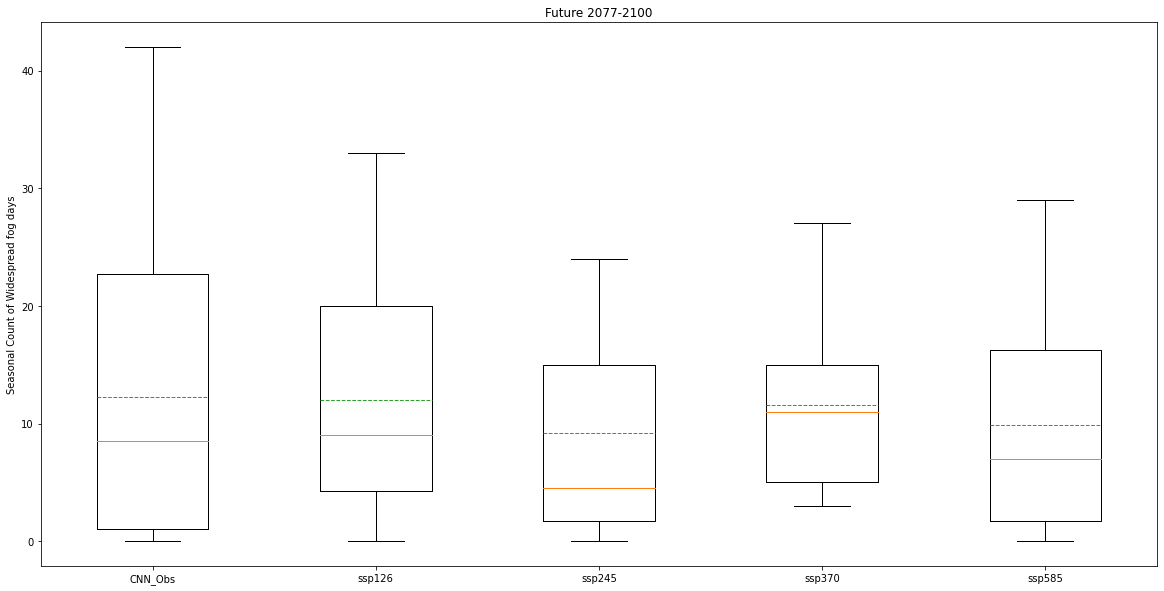

In [71]:
yList=getyTs(y)
cnnList=getyTs(CNN)
ssp126List=getyTsFu3(ssp126)
ssp245List=getyTsFu3(ssp245)
ssp370List=getyTsFu3(ssp370)
ssp585List=getyTsFu3(ssp585)

ssp245List

columns=[cnnList,ssp126List,ssp245List,ssp370List,ssp585List]
fig, ax = plt.subplots(figsize=(20, 10))
#ax.boxplot(columns,0,'+',  meanline=True, showmeans=True)
ax.boxplot(columns, meanline=True,showmeans=True,showfliers=False)
plt.xticks([1, 2,3,4,5], ["CNN_Obs", "ssp126", "ssp245", "ssp370",
                                          "ssp585"])

plt.ylabel('Seasonal Count of Widespread fog days') 
plt.title('Future 2077-2100') 
plt.savefig('box_plot_2077-2100.eps')